# Bezier curve for physics, attempt 1

We try and solve a simple projectile, using multiple methods

In [1]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib.pyplot import *

In [2]:
mass = 1.0
g = 1.0
v0 = 5

period = 2.0 * v0 / g
steps = 10

deltaT = period / (steps)

t = np.arange(0, steps+1, deltaT)
N = len(t)

First we can create our analytical solution

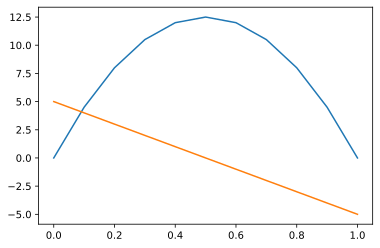

In [3]:
xAnalytical = -0.5*g*(t**2) + v0*t
vAnalytical = -g*t + v0
plot(t / period, xAnalytical)
plot(t / period, vAnalytical)
show()

Then, we can create our run-of-the-mill, semi-implicit euler solution

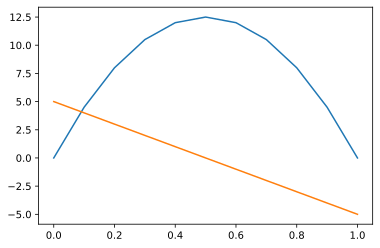

In [4]:
xEuler = [0.0]
vEuler = [v0]

for i in range(1, N):
    vEuler.append(vEuler[i-1] + (-g) * deltaT)
    xEuler.append(xEuler[i-1] + vEuler[i-1] * deltaT + 0.5 * (-g) * deltaT**2)

plot(t / period, xEuler)
plot(t / period, vEuler)
show()

Finally, we can prepare our data for the bezier curve method

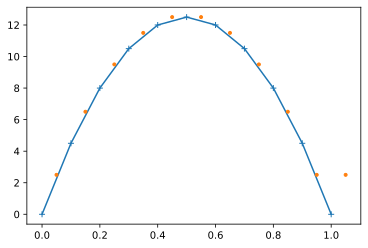

In [5]:
xBezier = [0.0]
vBezier = [v0]
bBezier = []

for n in range(0, N-1):
    
    xn = xBezier[n]
    vn = vBezier[n]
    an = -g
    
    b0 = xBezier[n]
    b2 = xn + (vn * deltaT) + (0.5 * an * deltaT**2.0)
    
    v =  vn + an * deltaT
    b1 = xn + 0.5 * vn * deltaT
    
    xBezier.append(b2)
    vBezier.append(v)
    bBezier.append(b1)
    
#     vBezier.append(vBezier[i-1] + (-springK * xBezier[i-1]) * deltaT)
#     xBezier.append(xBezier[i-1] + vBezier[i] * deltaT)
#     bBezier.append(xBezier[i-1] + 0.5 * vBezier[i-1] * deltaT)
    
bBezier.append(bBezier[-1])

plot(t / period, xBezier, '+-')
plot((t + 0.5 * deltaT) / period, bBezier, '.')
show()

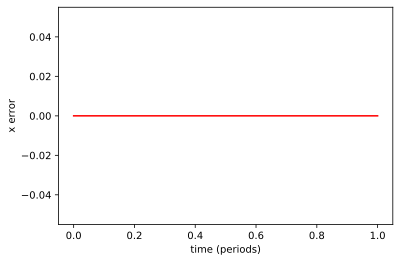

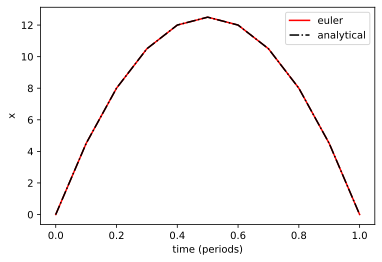

In [6]:
xErr2 = (xBezier - xAnalytical)
vErr2 = (vEuler - vAnalytical)

figure()
plot(t/period, xErr2, 'r', label = 'position error')
xlabel('time (periods)')
ylabel('x error')

figure()
plot(t/period, xBezier, 'r', label = 'euler')
plot(t/period, xAnalytical, 'k-.', label = 'analytical')
xlabel('time (periods)')
ylabel('x')
legend()
show()

## Interpolation

Now we can interpolate between our points to get nicer curves. We use two methods:

 * basic interpolation (x = x0 + hv0)
 * euler-based interpolation

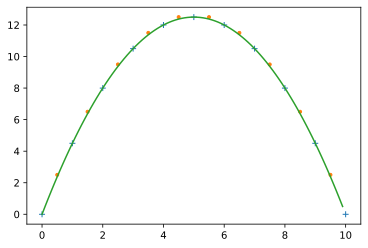

In [9]:
substeps = 10

xInterp = []
tInterp = []

for step in range(1, N):
    
    tn = t[step-1]
    b0 = xBezier[step-1]
    b2 = xBezier[step]
    b1 = bBezier[step-1]
    
    temp = []
    tempT = []
    
    temp.append(b0)
    tempT.append(tn)
    for i in range(1, substeps):
        t0 = i / float(substeps)
        
#         r = b1 + (1-t0)**2 * (b0 - b1) + t0**2*(b2-b1)
        r = b0*(1-t0)**2 + 2*(1-t0)*t0*b1 + b2 * t0**2
        tempT.append(tn + t0 * deltaT) #r[0])
        temp.append(r)
    
    xInterp += temp
    tInterp += tempT


zoom = 10
    
tt = t[0:zoom+1]
tbt = (t + 0.5 * deltaT)[0:zoom]
tti = (tInterp)[0:zoom*substeps+1]

plot(tt, xBezier[0:zoom+1], '+')
plot(tbt, bBezier[0:zoom], '.')
plot(tti, xInterp[0:zoom*substeps+1])
show()